<a href="https://colab.research.google.com/github/Gomez-Lab/WoundSizeEstimation/blob/main/Wound_Cropper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wound area of interest cropping

This notebook will cover cropping the wounded area from the outputs given by the detection algorithm.

### Support for importing files from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cropping

The files to be cropped should be the same (size invariant) as the ones that the Detection algorithm performed inference on. I used the 2x resized images here, to generate 352 x 352 crops centered on the wound detection point

In [ ]:
%cd /content/drive/My\ Drive/Hector_MJ_Google_Drive/Hector_MJ/Angle_images/New_data

/content/drive/.shortcut-targets-by-id/175Vkdh2mGaZ7CZsZetvNssl0puand1tS/Hector_MJ_Google_Drive/Hector_MJ/Angle_images/New_data


In [ ]:
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd

In [ ]:
directory = "/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Angle_images/New_data"
Path(directory + "/Small Rotated").mkdir(parents=True, exist_ok=True)

In [ ]:
df = pd.read_csv("angle_key.csv")

In [ ]:
df

,Coded ID,Mouse ID,Wound,Angle
0,23,A8-1,L,0
1,46,A8-1,L,-11
2,47,A8-1,L,-10
3,1,A8-3,L,0
4,9,A8-3,L,-12
5,35,A8-3,L,-12
6,15,A8-4,L,0
7,44,A8-4,L,-13
8,40,A8-4,L,-13
9,34,A8-5,L,0


In [ ]:
count = 0
for file_name in os.listdir(directory):

  if file_name[-5:] == '.tiff' or file_name[-4:] == '.tif' or file_name[-4:] == '.JPG' or file_name[-4:] == '.jpg':
      print("Processing %s" % file_name)
      image = Image.open(os.path.join(directory, file_name))

      x,y = image.size
      new_dimensions = (x//2, y//2)
      output = image.resize(new_dimensions, Image.ANTIALIAS)

      if x > y:
          output = output.rotate(90, expand=True)

      '''
      loc = file_name.split(".")[0].split(" ")[-1]
      meta = df.loc[df['Coded ID'] == int(loc)].values[0]

      day = "Day 0_"
      (loc, id, side, angle) = meta

      out_name = str(loc) + "_" + id + "-" + side + "_Angle:" + str(angle) + ".png"
      '''
      out_name = file_name.split(".")[0] + ".png"
      output_file_name = os.path.join(directory + "/Small Rotated", out_name)
      output.save(output_file_name, "PNG", quality = 95)
      count += 1

print("All done, processed: ", count)

Processing Michelle  - 26.JPG
Processing Michelle  - 27.JPG
Processing Michelle  - 28.JPG
Processing Michelle  - 29.JPG
Processing Michelle  - 30.JPG
Processing Michelle  - 31.JPG
Processing Michelle  - 32.JPG
Processing Michelle  - 33.JPG
Processing Michelle  - 34.JPG
Processing Michelle  - 35.JPG
Processing Michelle  - 36.JPG
Processing Michelle  - 37.JPG
Processing Michelle  - 38.JPG
Processing Michelle  - 39.JPG
Processing Michelle  - 40.JPG
Processing Michelle  - 41.JPG
Processing Michelle  - 42.JPG
Processing Michelle  - 43.JPG
Processing Michelle  - 44.JPG
Processing Michelle  - 45.JPG
Processing Michelle  - 46.JPG
Processing Michelle  - 47.JPG
Processing Michelle  - 48.JPG
Processing Michelle  - 1.JPG
Processing Michelle  - 2.JPG
Processing Michelle  - 3.JPG
Processing Michelle  - 4.JPG
Processing Michelle  - 5.JPG
Processing Michelle  - 6.JPG
Processing Michelle  - 7.JPG
Processing Michelle  - 8.JPG
Processing Michelle  - 9.JPG
Processing Michelle  - 10.JPG
Processing Michelle

In [ ]:
%cd Small\ Rotated

/content/drive/.shortcut-targets-by-id/175Vkdh2mGaZ7CZsZetvNssl0puand1tS/Hector_MJ_Google_Drive/Hector_MJ/Angle_images/New_data/Small Rotated


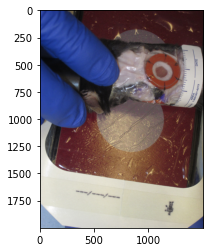

In [ ]:
image = Image.open(os.listdir('.')[0])

im_array = np.asarray(image)
plt.imshow(im_array)
plt.show()

In [ ]:
width, height = image.size
print(width, height)

1500 2000


In [ ]:
%ls -1 | wc -l

48


In [ ]:
%ls

'Michelle  - 10.png'  'Michelle  - 25.png'  'Michelle  - 3.png'
'Michelle  - 11.png'  'Michelle  - 26.png'  'Michelle  - 40.png'
'Michelle  - 12.png'  'Michelle  - 27.png'  'Michelle  - 41.png'
'Michelle  - 13.png'  'Michelle  - 28.png'  'Michelle  - 42.png'
'Michelle  - 14.png'  'Michelle  - 29.png'  'Michelle  - 43.png'
'Michelle  - 15.png'  'Michelle  - 2.png'   'Michelle  - 44.png'
'Michelle  - 16.png'  'Michelle  - 30.png'  'Michelle  - 45.png'
'Michelle  - 17.png'  'Michelle  - 31.png'  'Michelle  - 46.png'
'Michelle  - 18.png'  'Michelle  - 32.png'  'Michelle  - 47.png'
'Michelle  - 19.png'  'Michelle  - 33.png'  'Michelle  - 48.png'
'Michelle  - 1.png'   'Michelle  - 34.png'  'Michelle  - 4.png'
'Michelle  - 20.png'  'Michelle  - 35.png'  'Michelle  - 5.png'
'Michelle  - 21.png'  'Michelle  - 36.png'  'Michelle  - 6.png'
'Michelle  - 22.png'  'Michelle  - 37.png'  'Michelle  - 7.png'
'Michelle  - 23.png'  'Michelle  - 38.png'  'Michelle  - 8.png'
'Michelle  - 24.png'  'Michelle

In [ ]:
df

,Coded ID,Mouse ID,Wound,Angle
0,23,A8-1,L,0
1,46,A8-1,L,-11
2,47,A8-1,L,-10
3,1,A8-3,L,0
4,9,A8-3,L,-12
5,35,A8-3,L,-12
6,15,A8-4,L,0
7,44,A8-4,L,-13
8,40,A8-4,L,-13
9,34,A8-5,L,0


In [ ]:
all_matches = df.loc[df['Mouse ID'] == "A8-3"]

In [ ]:
side_matches = all_matches.loc[df['Wound'] == "L"]

In [ ]:
side_matches

,Coded ID,Mouse ID,Wound,Angle
3,1,A8-3,L,0
4,9,A8-3,L,-12
5,35,A8-3,L,-12


In [ ]:
ordered_list = side_matches["Coded ID"].tolist()

In [ ]:
ordered_list.index(35)

2

In [ ]:
i = 0
for fileName in os.listdir("."):

    if fileName[-4:] == '.png' or fileName[-4:] == '.jpg':

        # This text file contains the detection coordinates
        textDir = '/content/drive/My Drive/Hector_MJ_Google_Drive/Hector_MJ/Mouse wounds/Wound Detection/yolov3/output/'
        textFile = textDir + fileName[:-4] + '.txt'

        print("Cropping", fileName)
        with open(textFile) as info:

            points = (info.readline().split(" "))

            image = Image.open(fileName)
            width, height = image.size
            x = float(points[1]) * width
            y = float(points[2]) * height
            cropWidth = 176
            cropHeight = 176
            left = round(x - cropWidth, 1)
            right = round(x + cropWidth, 1)
            top = round(y - cropHeight, 1)
            bottom = round(y + cropHeight, 1)

            crop = image.crop((left, top, right, bottom))

            # You can chage this to any (existing) directory in order to
            # change the save location
            loc = fileName.split(".")[0].split(" ")[-1]
            meta = df.loc[df['Coded ID'] == int(loc)].values[0]

            (loc, id, side, angle) = meta

            ## Dealing with the Day stuff
            all_matches = df.loc[df['Mouse ID'] == id]
            side_matches = all_matches.loc[df['Wound'] == side]
            ordered_list = side_matches['Coded ID'].tolist()
            day_number = ordered_list.index(loc)

            day = "Day " + str(day_number)

            ##

            out_name = day + "_" + id + "-" + side + ", Angle " + str(angle) + ", Loc " + str(loc) + ".png"

            crop.save('/content/drive/My Drive/Hector_MJ_Google_Drive/Pipeline/crops_angled/' + out_name)
            i+=1

print("Total cropped:", i)

Cropping Michelle  - 26.png
Cropping Michelle  - 27.png
Cropping Michelle  - 28.png
Cropping Michelle  - 29.png
Cropping Michelle  - 30.png
Cropping Michelle  - 31.png
Cropping Michelle  - 32.png
Cropping Michelle  - 33.png
Cropping Michelle  - 34.png
Cropping Michelle  - 35.png
Cropping Michelle  - 36.png
Cropping Michelle  - 37.png
Cropping Michelle  - 38.png
Cropping Michelle  - 39.png
Cropping Michelle  - 40.png
Cropping Michelle  - 41.png
Cropping Michelle  - 42.png
Cropping Michelle  - 43.png
Cropping Michelle  - 44.png
Cropping Michelle  - 45.png
Cropping Michelle  - 46.png
Cropping Michelle  - 47.png
Cropping Michelle  - 48.png
Cropping Michelle  - 1.png
Cropping Michelle  - 2.png
Cropping Michelle  - 3.png
Cropping Michelle  - 4.png
Cropping Michelle  - 5.png
Cropping Michelle  - 6.png
Cropping Michelle  - 7.png
Cropping Michelle  - 8.png
Cropping Michelle  - 9.png
Cropping Michelle  - 10.png
Cropping Michelle  - 11.png
Cropping Michelle  - 12.png
Cropping Michelle  - 13.png
C

In [ ]:
%cd ../../white_mice_crops/

/content/drive/.shortcut-targets-by-id/175Vkdh2mGaZ7CZsZetvNssl0puand1tS/Hector_MJ_Google_Drive/Pipeline/white_mice_crops


In [ ]:
%ls -1 | wc -l

144


The output printed at the end of the for loop block should be the same as the number of files found by `%ls`